In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [65]:
train_data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [66]:
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
train_data.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
train_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding 'Iris-setosa'
train_data['Species'] = LabelEncoder().fit_transform(train_data['Species'])

In [71]:
y = train_data['Species']
X = train_data.drop(['Id' ,'Species'], axis=1)

In [72]:
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [73]:
train_data.Species.unique()

array([0, 1, 2])

In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [75]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm' ,'PetalWidthCm']))

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [76]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['SepalLengthCm', 'SepalWidthCm',
                                  'PetalLengthCm', 'PetalWidthCm'])])

In [77]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [78]:
X_train_normal[:5]

array([[0.55555556, 0.54166667, 0.64912281, 0.625     ],
       [0.61111111, 0.41666667, 0.84210526, 0.875     ],
       [0.36111111, 0.20833333, 0.50877193, 0.41666667],
       [0.38888889, 0.33333333, 0.61403509, 0.5       ],
       [0.58333333, 0.33333333, 0.80701754, 0.875     ]])

In [79]:
y_train[99]

1

In [87]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu') , 
    tf.keras.layers.Dense(9,activation = 'relu') , 
    tf.keras.layers.Dense(3 , activation = 'softmax')
])

In [88]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['accuracy'])

In [90]:
history = model.fit(X_train_normal,
                   y_train,
                   epochs = 10,
                   validation_data = (X_test_normal , y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9690 - loss: 0.0579 - val_accuracy: 0.9333 - val_loss: 0.1175
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.0555 - val_accuracy: 0.9333 - val_loss: 0.1177
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.0572 - val_accuracy: 0.9333 - val_loss: 0.1067
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.0554 - val_accuracy: 0.9333 - val_loss: 0.1010
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.0541 - val_accuracy: 0.9333 - val_loss: 0.0981
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9690 - loss: 0.0546 - val_accuracy: 0.9333 - val_loss: 0.0904
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.0534 - val_accuracy: 0.9333 - val_loss: 0.0856
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9690 - loss: 0.0526 - val_accuracy: 0.9333 - val_loss: 0.0818
Epoch

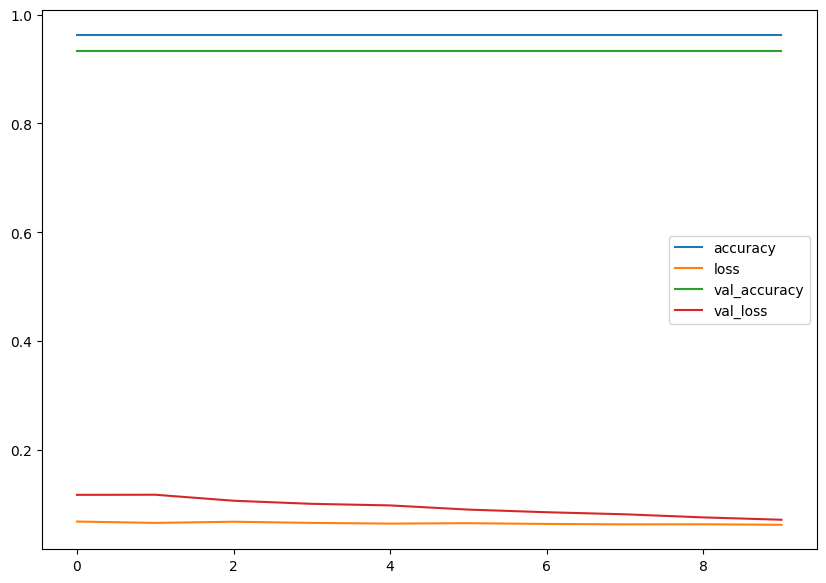

In [91]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));